In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transform
import matplotlib.pyplot as plt

In [59]:
device = torch.device('cpu' if torch.cuda.is_available() else 'cpu')

In [73]:
input_size = 784
hidden_size = 100
num_class = 10
epochs = 20
batch_size = 256
lr = 0.001

# MNIST Dataset

In [74]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform.ToTensor())

In [75]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# show Sample Data

In [76]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([256, 1, 28, 28]) torch.Size([256])


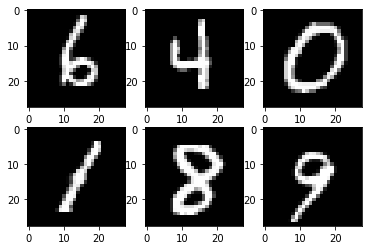

In [77]:
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [78]:
class MNISTNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_class):
        super(MNISTNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_class)

    def forward(self, X):
        out = self.l1(X)
        out = self.relu(out)
        out = self.l2(out)
        return out

input_size = 784
device = torch.device('cpu')
model = MNISTNet(input_size, hidden_size, num_class)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Training Loop
n_total_step = len(train_loader)

for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward
        output = model(images)
        loss = criterion(output, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {epochs}, step {i+1}/{n_total_step}, loss = {loss.item}')
# test pass
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        out = model(images)

        _, predictions = torch.max(out, 1)
        n_samples += labels.shape[0]
        n_correct = (predictions == labels).sum().item()
acc = 100.0 * n_correct / n_samples
print(f'accuracy: {acc}')

epoch 1 / 20, step 100/235, loss = <built-in method item of Tensor object at 0x7f5273960950>
epoch 1 / 20, step 200/235, loss = <built-in method item of Tensor object at 0x7f5273380f90>
epoch 2 / 20, step 100/235, loss = <built-in method item of Tensor object at 0x7f5273380540>
epoch 2 / 20, step 200/235, loss = <built-in method item of Tensor object at 0x7f5273380540>
epoch 3 / 20, step 100/235, loss = <built-in method item of Tensor object at 0x7f5270fc43b0>
epoch 3 / 20, step 200/235, loss = <built-in method item of Tensor object at 0x7f5270fc43b0>
epoch 4 / 20, step 100/235, loss = <built-in method item of Tensor object at 0x7f5270efb310>
epoch 4 / 20, step 200/235, loss = <built-in method item of Tensor object at 0x7f5270efb310>
epoch 5 / 20, step 100/235, loss = <built-in method item of Tensor object at 0x7f5270fc43b0>
epoch 5 / 20, step 200/235, loss = <built-in method item of Tensor object at 0x7f5273960950>
epoch 6 / 20, step 100/235, loss = <built-in method item of Tensor obj